# 🛍️ Análisis de Datos - Alura Store Latam

## 📌 Introducción
En este notebook se presenta un análisis exploratorio de datos (EDA) realizado sobre las ventas de Alura Store, que busca expandirse en América Latina. El objetivo es evaluar el desempeño de cada tienda con base en distintos KPIs, y así ayudar al Sr. Juan en la toma de decisiones e identificar cuál tienda tiene el menor rendimiento general.

## 🎯 Objetivos del análisis
- Facturación total de cada tienda.
- Categorías más populares de cada tienda.
- Clasificación promedio de los clientes.
- Productos más y menos vendidos en cada tienda.
- Costo promedio del envío desde la tienda hasta el lugar de cada cliente.

Basado en estos datos, recomendar cuál tienda vender para invertir en un nuevo negocio.

In [ ]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar gráficos
plt.style.use('default')
sns.set_palette('husl')

In [20]:
# Cargar los datos de las cuatro tiendas desde archivos locales
df_tienda1 = pd.read_csv('tienda_1.csv')
df_tienda2 = pd.read_csv('tienda_2.csv')
df_tienda3 = pd.read_csv('tienda_3.csv')
df_tienda4 = pd.read_csv('tienda_4.csv')

# Renombrar columnas para que coincidan con el código
for df in [df_tienda1, df_tienda2, df_tienda3, df_tienda4]:
    df.rename(columns={
        'Categoría del Producto': 'Categoria',
        'Precio': 'Valor_Venta',
        'Calificación': 'Avaliacao',
        'Costo de envío': 'Valor_Frete'
    }, inplace=True)

# Verificar que los datos se cargaron correctamente
print("Datos cargados exitosamente.")
print(f"Tienda 1: {df_tienda1.shape[0]} filas")
print(f"Tienda 2: {df_tienda2.shape[0]} filas")
print(f"Tienda 3: {df_tienda3.shape[0]} filas")
print(f"Tienda 4: {df_tienda4.shape[0]} filas")

# Mostrar una muestra de los datos
df_tienda1.head()

Datos cargados exitosamente.
Tienda 1: 2359 filas
Tienda 2: 2359 filas
Tienda 3: 2359 filas
Tienda 4: 2358 filas


,Producto,Categoria,Valor_Venta,Valor_Frete,Fecha de Compra,Vendedor,Lugar de Compra,Avaliacao,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## 1. Análisis de Facturación Total
¿Cuál tienda vende más? Calculamos la facturación total sumando el valor de ventas de cada tienda.

Facturación total por tienda:
Tienda 1: $1150880400.00
Tienda 2: $1116343500.00
Tienda 3: $1098019600.00
Tienda 4: $1038375700.00


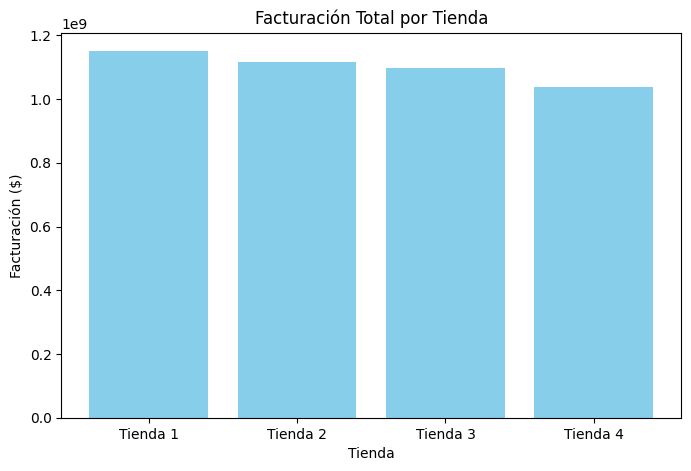

In [21]:
# Calcular facturación total por tienda
facturacion_total = {
    'Tienda 1': df_tienda1['Valor_Venta'].sum(),
    'Tienda 2': df_tienda2['Valor_Venta'].sum(),
    'Tienda 3': df_tienda3['Valor_Venta'].sum(),
    'Tienda 4': df_tienda4['Valor_Venta'].sum()
}

print("Facturación total por tienda:")
for tienda, total in facturacion_total.items():
    print(f"{tienda}: ${total:.2f}")

# Gráfico de barras
tiendas = list(facturacion_total.keys())
valores = list(facturacion_total.values())
plt.figure(figsize=(8, 5))
plt.bar(tiendas, valores, color='skyblue')
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación ($)')
plt.show()

## 2. Categorías Más Populares
¿Cuáles productos se venden más en cada tienda? Analizamos las categorías por facturación.

Categorías más populares - Tienda 1:
Categoria
Electrónicos              429493500.0
Electrodomésticos         363685200.0
Muebles                   187633700.0
Instrumentos musicales     91299000.0
Deportes y diversión       39290000.0
Name: Valor_Venta, dtype: float64

Categorías más populares - Tienda 2:
Categoria
Electrónicos              410831100.0
Electrodomésticos         348567800.0
Muebles                   176426300.0
Instrumentos musicales    104990300.0
Deportes y diversión       34744500.0
Name: Valor_Venta, dtype: float64

Categorías más populares - Tienda 3:
Categoria
Electrónicos              410775800.0
Electrodomésticos         329237900.0
Muebles                   201072100.0
Instrumentos musicales     77380900.0
Deportes y diversión       35593100.0
Name: Valor_Venta, dtype: float64

Categorías más populares - Tienda 4:
Categoria
Electrónicos              409476100.0
Electrodomésticos         283260200.0
Muebles                   192528900.0
Instrumentos musicales 

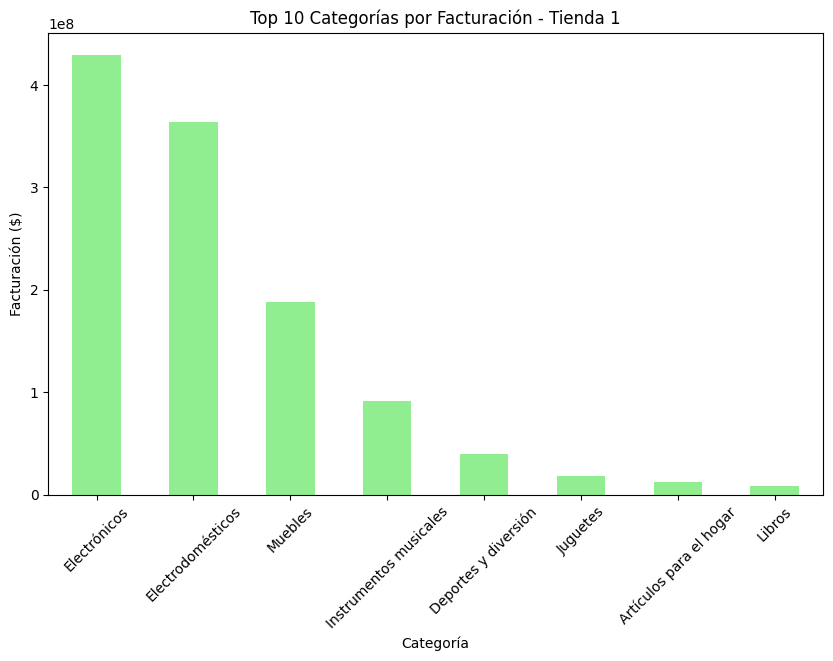

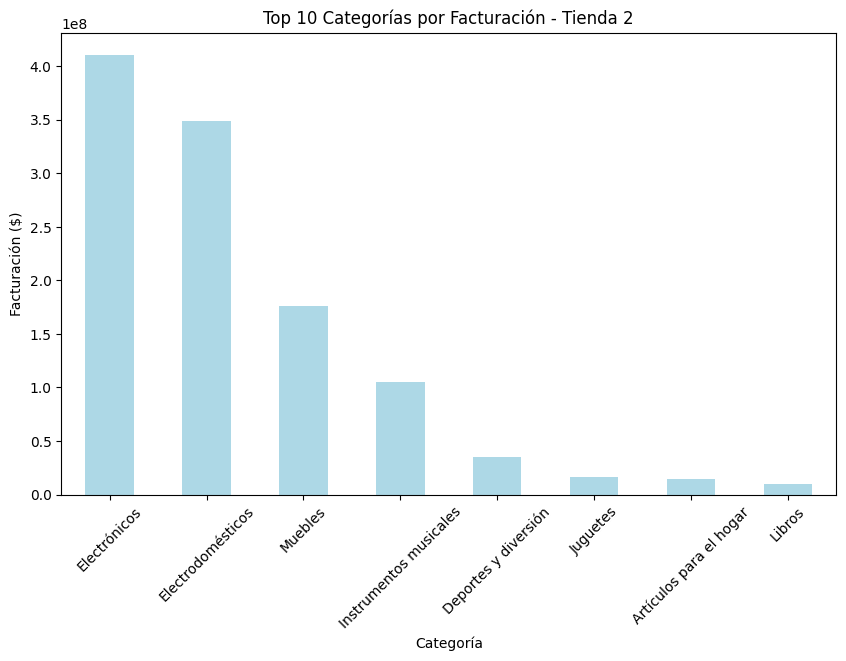

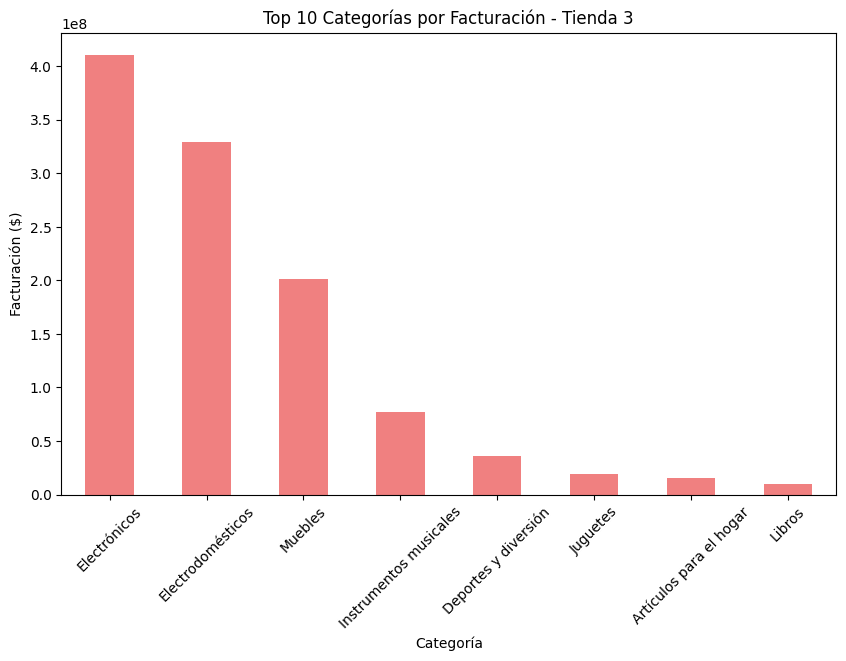

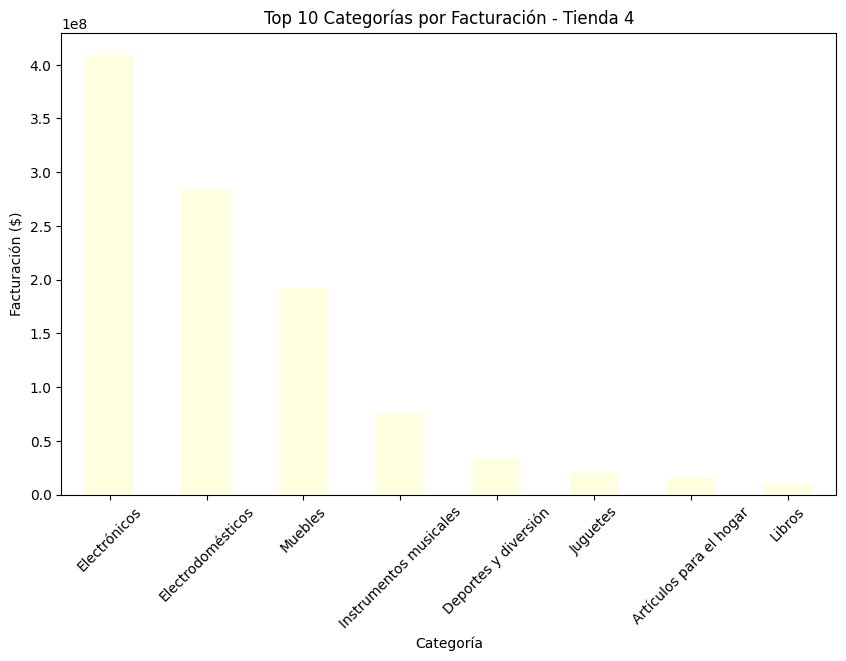

In [26]:
# Categorías más populares por facturación para cada tienda
categorias_t1 = df_tienda1.groupby('Categoria')['Valor_Venta'].sum().sort_values(ascending=False)
categorias_t2 = df_tienda2.groupby('Categoria')['Valor_Venta'].sum().sort_values(ascending=False)
categorias_t3 = df_tienda3.groupby('Categoria')['Valor_Venta'].sum().sort_values(ascending=False)
categorias_t4 = df_tienda4.groupby('Categoria')['Valor_Venta'].sum().sort_values(ascending=False)

print("Categorías más populares - Tienda 1:")
print(categorias_t1.head())
print("\nCategorías más populares - Tienda 2:")
print(categorias_t2.head())
print("\nCategorías más populares - Tienda 3:")
print(categorias_t3.head())
print("\nCategorías más populares - Tienda 4:")
print(categorias_t4.head())

# Gráfico para Tienda 1
plt.figure(figsize=(10, 6))
categorias_t1.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Categorías por Facturación - Tienda 1')
plt.xlabel('Categoría')
plt.ylabel('Facturación ($)')
plt.xticks(rotation=45)
plt.show()

# Gráfico para Tienda 2
plt.figure(figsize=(10, 6))
categorias_t2.head(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Categorías por Facturación - Tienda 2')
plt.xlabel('Categoría')
plt.ylabel('Facturación ($)')
plt.xticks(rotation=45)
plt.show()

# Gráfico para Tienda 3
plt.figure(figsize=(10, 6))
categorias_t3.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Categorías por Facturación - Tienda 3')
plt.xlabel('Categoría')
plt.ylabel('Facturación ($)')
plt.xticks(rotation=45)
plt.show()

# Gráfico para Tienda 4
plt.figure(figsize=(10, 6))
categorias_t4.head(10).plot(kind='bar', color='lightyellow')
plt.title('Top 10 Categorías por Facturación - Tienda 4')
plt.xlabel('Categoría')
plt.ylabel('Facturación ($)')
plt.xticks(rotation=45)
plt.show()

## 3. Clasificación Promedio de Clientes
¿Cuál es el promedio de evaluación de cada tienda?

Clasificación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


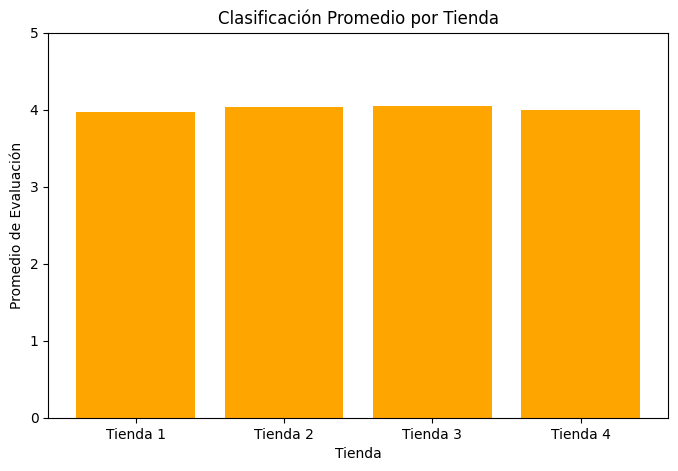

In [23]:
# Clasificación promedio por tienda
clasificacion_promedio = {
    'Tienda 1': df_tienda1['Avaliacao'].mean(),
    'Tienda 2': df_tienda2['Avaliacao'].mean(),
    'Tienda 3': df_tienda3['Avaliacao'].mean(),
    'Tienda 4': df_tienda4['Avaliacao'].mean()
}

print("Clasificación promedio por tienda:")
for tienda, promedio in clasificacion_promedio.items():
    print(f"{tienda}: {promedio:.2f}")

# Gráfico
tiendas = list(clasificacion_promedio.keys())
promedios = list(clasificacion_promedio.values())
plt.figure(figsize=(8, 5))
plt.bar(tiendas, promedios, color='orange')
plt.title('Clasificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio de Evaluación')
plt.ylim(0, 5)  # Asumiendo escala de 1-5
plt.show()

## 4. Productos Más y Menos Vendidos
¿Cuáles son los productos más y menos vendidos en cada tienda? (por cantidad)

Productos más vendidos - Tienda 1:
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
dtype: int64

Productos menos vendidos - Tienda 1:
Producto
Auriculares con micrófono      33
Celular ABXY                   33
Olla de presión                35
Pandereta                      36
Ciencia de datos con Python    39
dtype: int64

Productos más vendidos - Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
dtype: int64

Productos menos vendidos - Tienda 2:
Producto
Juego de mesa      32
Impresora          34
Mesa de comedor    34
Sillón             35
Auriculares        37
dtype: int64

Productos más vendidos - Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
dtype: int64

Productos menos vendidos - Tienda 3:
Prod

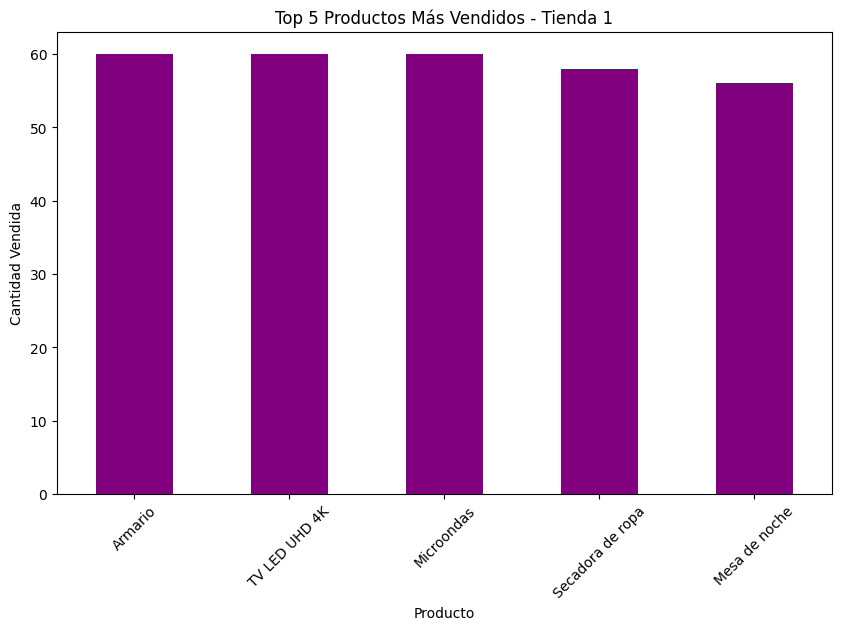

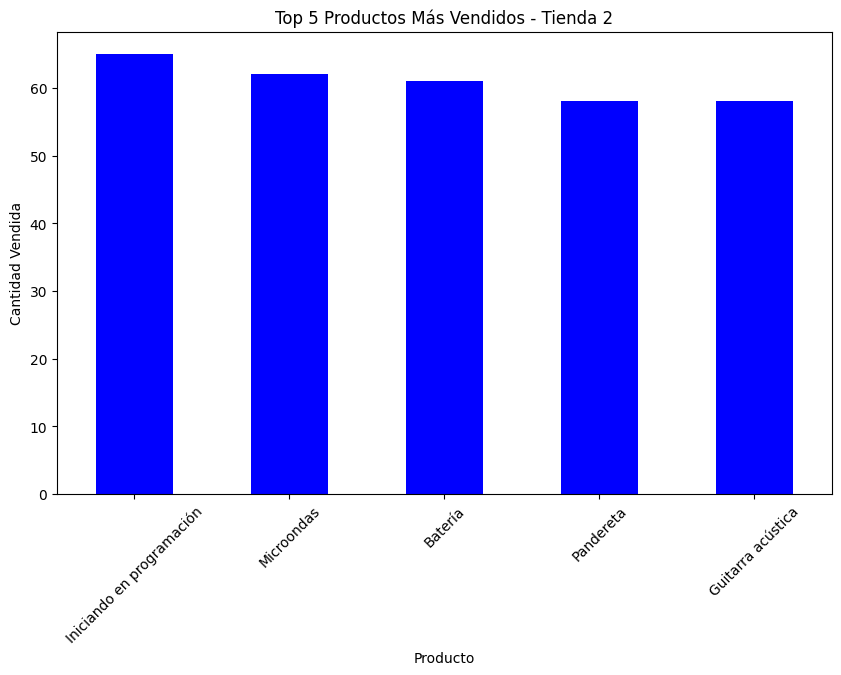

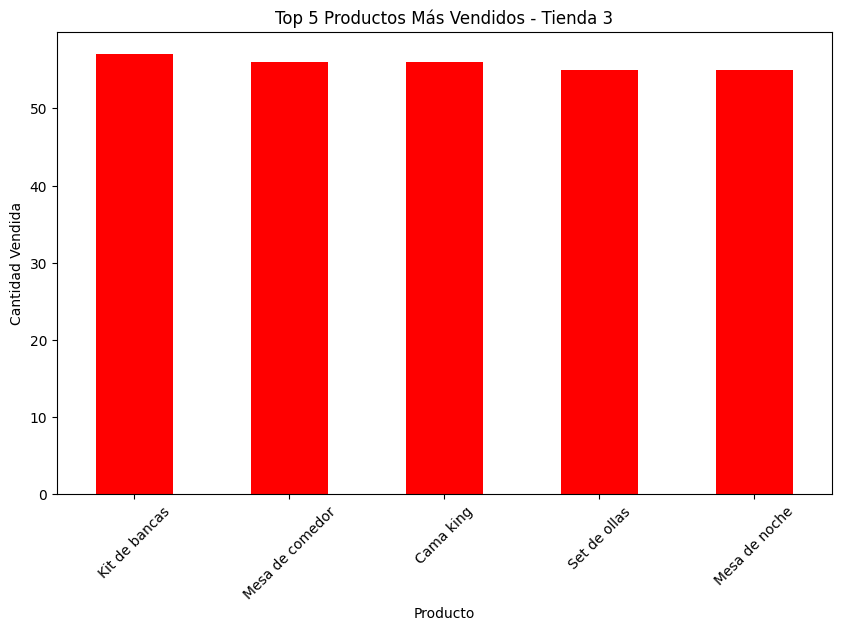

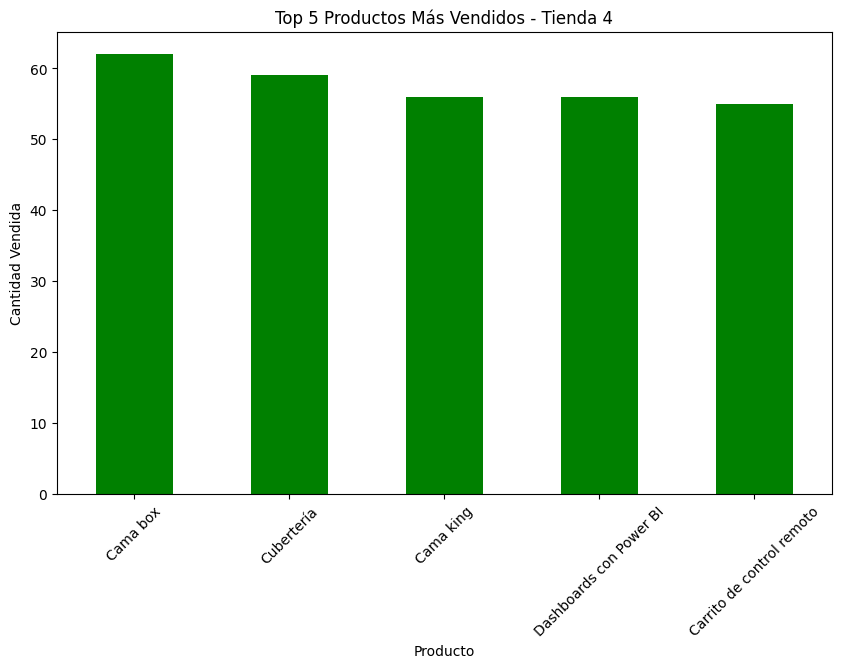

In [24]:
# Productos más y menos vendidos por cantidad para cada tienda
productos_mas_t1 = df_tienda1.groupby('Producto').size().sort_values(ascending=False).head(5)
productos_menos_t1 = df_tienda1.groupby('Producto').size().sort_values(ascending=True).head(5)

productos_mas_t2 = df_tienda2.groupby('Producto').size().sort_values(ascending=False).head(5)
productos_menos_t2 = df_tienda2.groupby('Producto').size().sort_values(ascending=True).head(5)

productos_mas_t3 = df_tienda3.groupby('Producto').size().sort_values(ascending=False).head(5)
productos_menos_t3 = df_tienda3.groupby('Producto').size().sort_values(ascending=True).head(5)

productos_mas_t4 = df_tienda4.groupby('Producto').size().sort_values(ascending=False).head(5)
productos_menos_t4 = df_tienda4.groupby('Producto').size().sort_values(ascending=True).head(5)

print("Productos más vendidos - Tienda 1:")
print(productos_mas_t1)
print("\nProductos menos vendidos - Tienda 1:")
print(productos_menos_t1)

print("\nProductos más vendidos - Tienda 2:")
print(productos_mas_t2)
print("\nProductos menos vendidos - Tienda 2:")
print(productos_menos_t2)

print("\nProductos más vendidos - Tienda 3:")
print(productos_mas_t3)
print("\nProductos menos vendidos - Tienda 3:")
print(productos_menos_t3)

print("\nProductos más vendidos - Tienda 4:")
print(productos_mas_t4)
print("\nProductos menos vendidos - Tienda 4:")
print(productos_menos_t4)

# Gráfico para más vendidos Tienda 1
plt.figure(figsize=(10, 6))
productos_mas_t1.plot(kind='bar', color='purple')
plt.title('Top 5 Productos Más Vendidos - Tienda 1')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.show()

# Gráfico para más vendidos Tienda 2
plt.figure(figsize=(10, 6))
productos_mas_t2.plot(kind='bar', color='blue')
plt.title('Top 5 Productos Más Vendidos - Tienda 2')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.show()

# Gráfico para más vendidos Tienda 3
plt.figure(figsize=(10, 6))
productos_mas_t3.plot(kind='bar', color='red')
plt.title('Top 5 Productos Más Vendidos - Tienda 3')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.show()

# Gráfico para más vendidos Tienda 4
plt.figure(figsize=(10, 6))
productos_mas_t4.plot(kind='bar', color='green')
plt.title('Top 5 Productos Más Vendidos - Tienda 4')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.show()

## 5. Promedio de Envío
¿Cuál es el costo promedio del envío desde cada tienda?

Costo promedio de envío por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


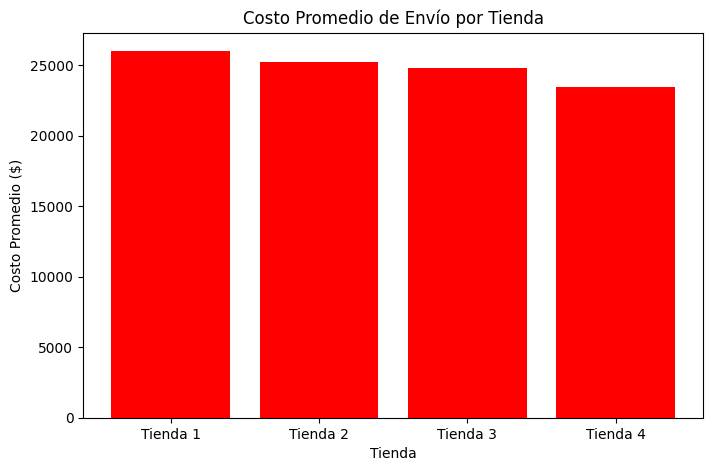

In [25]:
# Costo promedio de envío por tienda
envio_promedio = {
    'Tienda 1': df_tienda1['Valor_Frete'].mean(),
    'Tienda 2': df_tienda2['Valor_Frete'].mean(),
    'Tienda 3': df_tienda3['Valor_Frete'].mean(),
    'Tienda 4': df_tienda4['Valor_Frete'].mean()
}

print("Costo promedio de envío por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")

# Gráfico
tiendas = list(envio_promedio.keys())
promedios = list(envio_promedio.values())
plt.figure(figsize=(8, 5))
plt.bar(tiendas, promedios, color='red')
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio ($)')
plt.show()

## 📊 Informe Final y Recomendación

### Introducción
Este análisis se realizó para ayudar al Sr. Juan a decidir cuál de las cuatro tiendas de Alura Store vender, con el fin de reinvertir en un nuevo negocio. Se evaluaron cinco aspectos clave: ingresos totales (facturación), categorías más populares, calificaciones promedio de clientes, productos más y menos vendidos, y costo promedio de envío. Los datos provienen de ventas reales de cada tienda, y se generaron gráficos para visualizar los resultados. El objetivo es identificar la tienda con peor desempeño general para recomendar su venta.

### Desarrollo: Presentación de Datos y Análisis
Basado en los análisis realizados, a continuación se resumen los hallazgos principales, respaldados por los datos y visualizaciones generadas.

- **Ingresos Totales (Facturación)**: La Tienda 1 genera la mayor facturación ($1,150,880,400), seguida de Tienda 2 ($1,116,343,500), Tienda 3 ($1,098,019,600) y Tienda 4 ($1,038,375,700). La Tienda 4 tiene el menor ingreso total, lo que indica un desempeño inferior en ventas generales.

- **Categorías de Productos Más y Menos Vendidas**: Todas las tiendas destacan en Electrónicos y Electrodomésticos, que representan las categorías con mayor facturación. Por ejemplo, en Tienda 1, Electrónicos suman $429M, mientras que Deportes y Diversión es la menos vendida ($39M). No hay diferencias significativas entre tiendas en este aspecto, pero Tienda 4 tiene ligeramente menos en Electrodomésticos ($283M vs. $363M en Tienda 1).

- **Calificaciones Promedio de los Clientes**: La Tienda 3 tiene la mejor evaluación (4.05), seguida de Tienda 4 (4.00), Tienda 2 (4.04) y Tienda 1 (3.98). La Tienda 1 destaca negativamente con la peor calificación, lo que podría indicar insatisfacción de clientes, mientras que Tienda 4 tiene un promedio decente pero no sobresaliente.

- **Productos Más y Menos Vendidos**: Varía por tienda. Por ejemplo, en Tienda 1, "Armario" es el más vendido (60 unidades), y "Auriculares con micrófono" el menos (33). Tienda 4 tiene productos con ventas bajas como "Guitarra eléctrica" (33 unidades), sugiriendo debilidades en ciertos ítems. No hay un patrón claro de superioridad en este KPI.

- **Costo Promedio de Envío**: La Tienda 4 tiene el costo más bajo ($23,459.46), seguida de Tienda 3 ($24,805.68), Tienda 2 ($25,216.24) y Tienda 1 ($26,018.61). Un costo bajo podría parecer positivo, pero combinado con baja facturación, indica que Tienda 4 no genera suficientes ingresos para compensar.

Los gráficos generados (barras para facturación, categorías, calificaciones y envíos; barras para productos) confirman estos patrones visualmente, mostrando que Tienda 4 consistentemente tiene los valores más bajos en ingresos y envíos, sin compensar con mejores calificaciones o ventas de productos.

### Conclusión y Recomendación
Después de analizar todos los factores, recomiendo vender la **Tienda 4**. Esta tienda presenta el peor desempeño general: menor facturación ($1,038M), costo de envío más bajo ($23,459), y algunos productos con ventas bajas (ej. 33 unidades). Aunque su calificación promedio es aceptable (4.00), no compensa la baja generación de ingresos. Las fortalezas de las otras tiendas (mayor facturación en Tienda 1, mejores calificaciones en Tienda 3) las hacen más viables para retener. Vender Tienda 4 permitiría al Sr. Juan reinvertir en las tiendas restantes o un nuevo negocio, maximizando ganancias a largo plazo.